In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
file_path = 'data/raw/WorldCupMatches.csv'

wcm_df = pd.read_csv(file_path)

In [3]:
# function to make all column names to lowercase
def update_columns_to_lower(df):
    df.columns = df.columns.str.lower().str.strip()
    return df


# function to convert all floats as integers
def float_to_int(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].astype(int)
    return df

In [4]:
cleaned_df = wcm_df.dropna(thresh=3)

In [5]:
attendance_mean = wcm_df['Attendance'].mean()

In [6]:
cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)

/tmp/ipykernel_68003/1476385943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)


In [7]:
cleaned_df = float_to_int(cleaned_df)

/tmp/ipykernel_68003/2045570823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_68003/2045570823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_68003/2045570823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [8]:
cleaned_df = update_columns_to_lower(cleaned_df)

In [9]:
# Filter matches involving Spain
spain_matches = cleaned_df[(cleaned_df['home team name'] == 'Spain') | (cleaned_df['away team name'] == 'Spain')]

In [10]:
sns.set(style="whitegrid")

In [11]:
folder_path = "data/cleaned/"
spain_matches.to_csv(folder_path + 'spain_matches.csv')

In [12]:
# Initialize variables to track streaks
current_winning_streak = 0
max_winning_streak = 0
current_losing_streak = 0
max_losing_streak = 0

# Iterate through the DataFrame
for index, match in spain_matches.iterrows():
    if match['home team name'] == 'Spain' or match['away team name'] == 'Spain':
        # Check if Spain won the match
        if (match['home team name'] == 'Spain' and match['home team goals'] > match['away team goals']) or (match['away team name'] == 'Spain' and match['away team goals'] > match['home team goals']):
            current_winning_streak += 1
            # Update max winning streak if current streak is greater
            if current_winning_streak > max_winning_streak:
                max_winning_streak = current_winning_streak
            # Reset losing streak
            current_losing_streak = 0
        # Check if Spain lost the match
        else:
            current_losing_streak += 1
            # Update max losing streak if current streak is greater
            if current_losing_streak > max_losing_streak:
                max_losing_streak = current_losing_streak
            # Reset winning streak
            current_winning_streak = 0

print("Spain's best winning streak:", max_winning_streak)
print("Spain's worst losing streak:", max_losing_streak)


Spain's best winning streak: 6
Spain's worst losing streak: 4


In [13]:
display(spain_matches)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,referee,assistant 1,assistant 2,roundid,matchid,home team initials,away team initials
23,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,,21000,3,0,BIRLEM Alfred (GER),CARMINATI Ettore (ITA),IVANCSICS Mihaly (HUN),204,1111,ESP,BRA
28,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,35000,0,0,BAERT Louis (BEL),ZENISEK Bohumil (TCH),IVANCSICS Mihaly (HUN),418,1122,ITA,ESP
30,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,0,Spain,,43000,1,0,MERCET Rene (SUI),IVANCSICS Mihaly (HUN),ZENISEK Bohumil (TCH),418,1123,ITA,ESP
55,1950,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3,1,USA,,9511,0,1,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208,1208,ESP,USA
60,1950,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2,0,Chile,,19790,2,0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208,1193,ESP,CHI
64,1950,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1,0,England,,74462,0,0,GALEATI Giovanni (ITA),LUTZ Jean (SUI),DATTILO Generoso (ITA),208,1199,ESP,ENG
69,1950,09 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2,2,Spain,,44802,1,2,GRIFFITHS Benjamin (WAL),DATTILO Generoso (ITA),ALVAREZ Alfredo (BOL),209,1207,URU,ESP
71,1950,13 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6,1,Spain,,152772,3,0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209,1186,BRA,ESP
73,1950,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3,1,Spain,,11227,2,0,VAN DER MEER Karel (NED),LUTZ Jean (SUI),GARCIA Prudencio (USA),209,1206,SWE,ESP
141,1962,31 May 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Czechoslovakia,1,0,Spain,,12700,0,0,STEINER Carl (AUT),MARINO Esteban (URU),VAN ROSBERG Walter Jose (CUW),231,1498,TCH,ESP


In [14]:
spain_matches = spain_matches.drop(columns=['referee', 'assistant 1', 'assistant 2', 'roundid', 'matchid'])

In [15]:
spain_matches.tail(3)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials
774,2014,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,48173,1,1,ESP,NED
790,2014,18 Jun 2014 - 16:00,Group B,Estadio do Maracana,Rio De Janeiro,Spain,0,2,Chile,,74101,0,2,ESP,CHI
804,2014,23 Jun 2014 - 13:00,Group B,Arena da Baixada,Curitiba,Australia,0,3,Spain,,39375,0,1,AUS,ESP


In [16]:
spain_matches.shape

(59, 15)

In [17]:
spain_matches.reset_index(drop=True, inplace=True)

In [18]:
spain_matches_2018_1 = {
    'year' : 2018,
    'datetime' : '15 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Fisht Stadium',
    'city' : 'Sochi',
    'home team name' : 'Portugal',
    'home team goals' : 3,
    'away team goals' : 3,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 43866,
    'half-time home goals' : 2,
    'half-time away goals' : 1,
    'home team initials' : 'POR',
    'away team initials' : 'ESP'
}

spain_matches_2018_2 = {
    'year' : 2018,
    'datetime' : '20 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Kazan Arena',
    'city' : 'Kazan',
    'home team name' : 'Iran',
    'home team goals' : 0,
    'away team goals' : 1,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 42718,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'IRN',
    'away team initials' : 'ESP'
}

spain_matches_2018_3 = {
    'year' : 2018,
    'datetime' : '25 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Kaliningrad Stadium',
    'city' : 'Kaliningrad',
    'home team name' : 'Spain',
    'home team goals' : 2,
    'away team goals' : 2,
    'away team name' : 'Morocco',
    #'win conditions' : ,
    'attendance' : 33973,
    'half-time home goals' : 1,
    'half-time away goals' : 1,
    'home team initials' : 'ESP',
    'away team initials' : 'MOR'
}

spain_matches_2018_4 = {
    'year' : 2018,
    'datetime' : '1 Jul 2018 - ',
    'stage' : 'Round of 16',
    'stadium' : 'Luzhniki Stadium',
    'city' : 'Moscow',
    'home team name' : 'Spain',
    'home team goals' : 1,
    'away team goals' : 1,
    'away team name' : 'Russia',
    'win conditions' : 'Russia win in penalties',
    'attendance' : 78011,
    'half-time home goals' : 1,
    'half-time away goals' : 1,
    'home team initials' : 'ESP',
    'away team initials' : 'RUS'
}

spain_matches_2022_1 = {
    'year' : 2022,
    'datetime' : '23 Nov 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Al Thumama Stadium',
    'city' : 'Doha',
    'home team name' : 'Spain',
    'home team goals' : 7,
    'away team goals' : 0,
    'away team name' : 'Costa Rica',
    #'win conditions' : ,
    'attendance' : 40013,
    'half-time home goals' : 3,
    'half-time away goals' : 0,
    'home team initials' : 'ESP',
    'away team initials' : 'CRC'
}

spain_matches_2022_2 = {
    'year' : 2022,
    'datetime' : '27 Nov 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Al Bayt Stadium',
    'city' : 'Al Khor',
    'home team name' : 'Spain',
    'home team goals' : 1,
    'away team goals' : 1,
    'away team name' : 'Germany',
    #'win conditions' : ,
    'attendance' : 68895,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'ESP',
    'away team initials' : 'GER'
}

spain_matches_2022_3 = {
    'year' : 2022,
    'datetime' : '1 Dec 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Khalifa International Stadium',
    'city' : 'Al Rayyan',
    'home team name' : 'Japan',
    'home team goals' : 2,
    'away team goals' : 1,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 44851,
    'half-time home goals' : 0,
    'half-time away goals' : 1,
    'home team initials' : 'JAP',
    'away team initials' : 'ESP'
}


spain_matches_2022_4 = {
    'year' : 2022,
    'datetime' : '6 Dec 2022 - ',
    'stage' : 'Round of 16',
    'stadium' : 'Education City Stadium',
    'city' : 'Al Rayyan',
    'home team name' : 'Morocco',
    'home team goals' : 0,
    'away team goals' : 0,
    'away team name' : 'Spain',
    'win conditions' : 'Morocco win after penalties',
    'attendance' : 44667,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'MOR',
    'away team initials' : 'ESP',
}


In [19]:
df2018_1 = pd.DataFrame(spain_matches_2018_1, index=[59])

In [20]:
df2018_2 = pd.DataFrame(spain_matches_2018_2, index=[60])

In [21]:
df2018_3 = pd.DataFrame(spain_matches_2018_3, index=[61])

In [22]:
df2018_4 = pd.DataFrame(spain_matches_2018_4, index=[62])

In [23]:
df2022_1 = pd.DataFrame(spain_matches_2022_1, index=[63])

In [24]:
df2022_2 = pd.DataFrame(spain_matches_2022_2, index=[64])

In [25]:
df2022_3 = pd.DataFrame(spain_matches_2022_3, index=[65])

In [26]:
df2022_4 = pd.DataFrame(spain_matches_2022_4, index=[66])

In [27]:
# to append df2 at the end of df1 dataframe
#df1.append(df2)

In [28]:
spain_matches = pd.concat([spain_matches, df2018_1], ignore_index=True, verify_integrity=True)

In [29]:
spain_matches.shape

(60, 15)

In [30]:
spain_matches = pd.concat([spain_matches, df2018_2], ignore_index=True, verify_integrity=True)

In [31]:
spain_matches = pd.concat([spain_matches, df2018_3], ignore_index=True, verify_integrity=True)

In [32]:
spain_matches = pd.concat([spain_matches, df2018_4], ignore_index=True, verify_integrity=True)

In [33]:
spain_matches = pd.concat([spain_matches, df2022_1], ignore_index=True, verify_integrity=True)

In [34]:
spain_matches = pd.concat([spain_matches, df2022_2], ignore_index=True, verify_integrity=True)

In [35]:
spain_matches = pd.concat([spain_matches, df2022_3], ignore_index=True, verify_integrity=True)

In [36]:
spain_matches = pd.concat([spain_matches, df2022_4], ignore_index=True, verify_integrity=True)

In [37]:
spain_matches.shape

(67, 15)

In [38]:
display(spain_matches)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials
0,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,,21000,3,0,ESP,BRA
1,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,35000,0,0,ITA,ESP
2,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,0,Spain,,43000,1,0,ITA,ESP
3,1950,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3,1,USA,,9511,0,1,ESP,USA
4,1950,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2,0,Chile,,19790,2,0,ESP,CHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2018,1 Jul 2018 -,Round of 16,Luzhniki Stadium,Moscow,Spain,1,1,Russia,Russia win in penalties,78011,1,1,ESP,RUS
63,2022,23 Nov 2022 -,Group E,Al Thumama Stadium,Doha,Spain,7,0,Costa Rica,NaN,40013,3,0,ESP,CRC
64,2022,27 Nov 2022 -,Group E,Al Bayt Stadium,Al Khor,Spain,1,1,Germany,NaN,68895,0,0,ESP,GER
65,2022,1 Dec 2022 -,Group E,Khalifa International Stadium,Al Rayyan,Japan,2,1,Spain,NaN,44851,0,1,JAP,ESP


In [39]:
win_conditions_mode = spain_matches['win conditions'].mode()[0]

In [40]:
print(win_conditions_mode)

In [41]:
spain_matches['win conditions'] = spain_matches['win conditions'].fillna(win_conditions_mode)

In [42]:
display(spain_matches)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials
0,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,,21000,3,0,ESP,BRA
1,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,35000,0,0,ITA,ESP
2,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,0,Spain,,43000,1,0,ITA,ESP
3,1950,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3,1,USA,,9511,0,1,ESP,USA
4,1950,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2,0,Chile,,19790,2,0,ESP,CHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2018,1 Jul 2018 -,Round of 16,Luzhniki Stadium,Moscow,Spain,1,1,Russia,Russia win in penalties,78011,1,1,ESP,RUS
63,2022,23 Nov 2022 -,Group E,Al Thumama Stadium,Doha,Spain,7,0,Costa Rica,,40013,3,0,ESP,CRC
64,2022,27 Nov 2022 -,Group E,Al Bayt Stadium,Al Khor,Spain,1,1,Germany,,68895,0,0,ESP,GER
65,2022,1 Dec 2022 -,Group E,Khalifa International Stadium,Al Rayyan,Japan,2,1,Spain,,44851,0,1,JAP,ESP


In [43]:
folder_path = "data/cleaned/"
spain_matches.to_csv(folder_path + 'spain_matches.csv')

In [44]:
# For matches where Spain was the home team
spain_home_matches = spain_matches[spain_matches['home team name'] == 'Spain']
spain_home_goals_scored = spain_home_matches['home team goals'].sum()
spain_home_goals_conceded = spain_home_matches['away team goals'].sum()

# For matches where Spain was the away team
spain_away_matches = spain_matches[spain_matches['away team name'] == 'Spain']
spain_away_goals_scored = spain_away_matches['away team goals'].sum()
spain_away_goals_conceded = spain_away_matches['home team goals'].sum()

In [45]:
# Calculate total goals scored and conceded by Spain
total_goals_scored = spain_home_goals_scored + spain_away_goals_scored
total_goals_conceded = spain_home_goals_conceded + spain_away_goals_conceded

# Calculate Spain's goal differential
spain_goal_differential = total_goals_scored - total_goals_conceded

In [46]:
# Create a dataframe to store Spain's goal information
spain_goals_info = pd.DataFrame({
    'Team': ['Spain'],
    'Total Goals Scored': [total_goals_scored],
    'Total Goals Conceded': [total_goals_conceded],
    'Goal Differential': [spain_goal_differential]
})

In [47]:
spain_goals_info.head()

,Team,Total Goals Scored,Total Goals Conceded,Goal Differential
0,Spain,108,75,33


In [48]:
# Filter matches where is spain is Home or is Away
spain_home_matches = cleaned_df[cleaned_df['home team name'] == 'Spain']
spain_away_matches = cleaned_df[cleaned_df['away team name'] == 'Spain']

# Calculate average goals scored and conceded when Spain is Home
avg_goals_scored_home = spain_home_matches['home team goals'].mean()
avg_goals_conceded_home = spain_home_matches['away team goals'].mean()

# Calculate average goals scored and conceded when Spain is Away
avg_goals_scored_away = spain_away_matches['away team goals'].mean()
avg_goals_conceded_away = spain_away_matches['home team goals'].mean()

# Calculate overall average goals scored and conceded
avg_goals_scored = (avg_goals_scored_home + avg_goals_scored_away) / 2
avg_goals_conceded = (avg_goals_conceded_home + avg_goals_conceded_away) / 2

print("Average goals scored by Spain per match:", avg_goals_scored)
print("Average goals conceded by Spain per match:", avg_goals_conceded)

Average goals scored by Spain per match: 1.5574712643678161
Average goals conceded by Spain per match: 1.1206896551724137


In [49]:
# Opponents Spain has beaten the most
most_wins = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts()

# Opponents Spain has lost to the most
most_losses = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts()

In [50]:
# Calculate Win-Loss Record
spain_home_wins = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] > spain_matches['away team goals'])])
spain_away_wins = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] > spain_matches['home team goals'])])
spain_wins = spain_home_wins + spain_away_wins

spain_home_losses = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] < spain_matches['away team goals'])])
spain_away_losses = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] < spain_matches['home team goals'])])
spain_losses = spain_home_losses + spain_away_losses

print("Spain's win-loss record:")
print("Wins:", spain_wins)
print("Losses:", spain_losses)

Spain's win-loss record:
Wins: 31
Losses: 19


/tmp/ipykernel_68003/4096371301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Average Goals Scored', 'Average Goals Conceded'], y=[avg_goals_scored, avg_goals_conceded], palette=colors[2:4])


<Axes: >

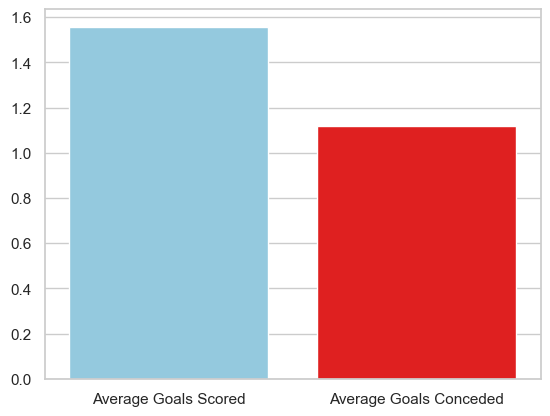

In [91]:
colors = ["green", "red", "skyblue", "red"]
sns.barplot(x=['Average Goals Scored', 'Average Goals Conceded'], y=[avg_goals_scored, avg_goals_conceded], palette=colors[2:4])

/tmp/ipykernel_68003/1202225666.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Wins', 'Losses'], y=[spain_wins, spain_losses], palette=colors[2:4])


<Axes: >

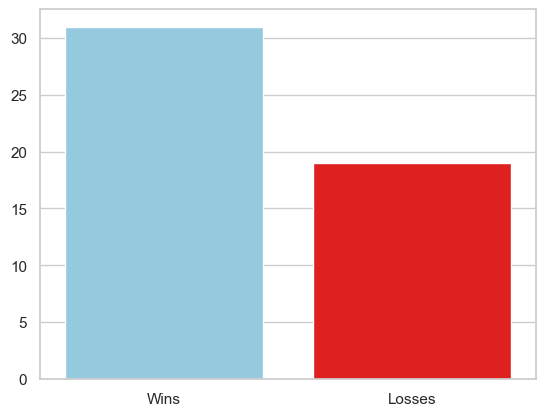

In [90]:
sns.barplot(x=['Wins', 'Losses'], y=[spain_wins, spain_losses], palette=colors[2:4])

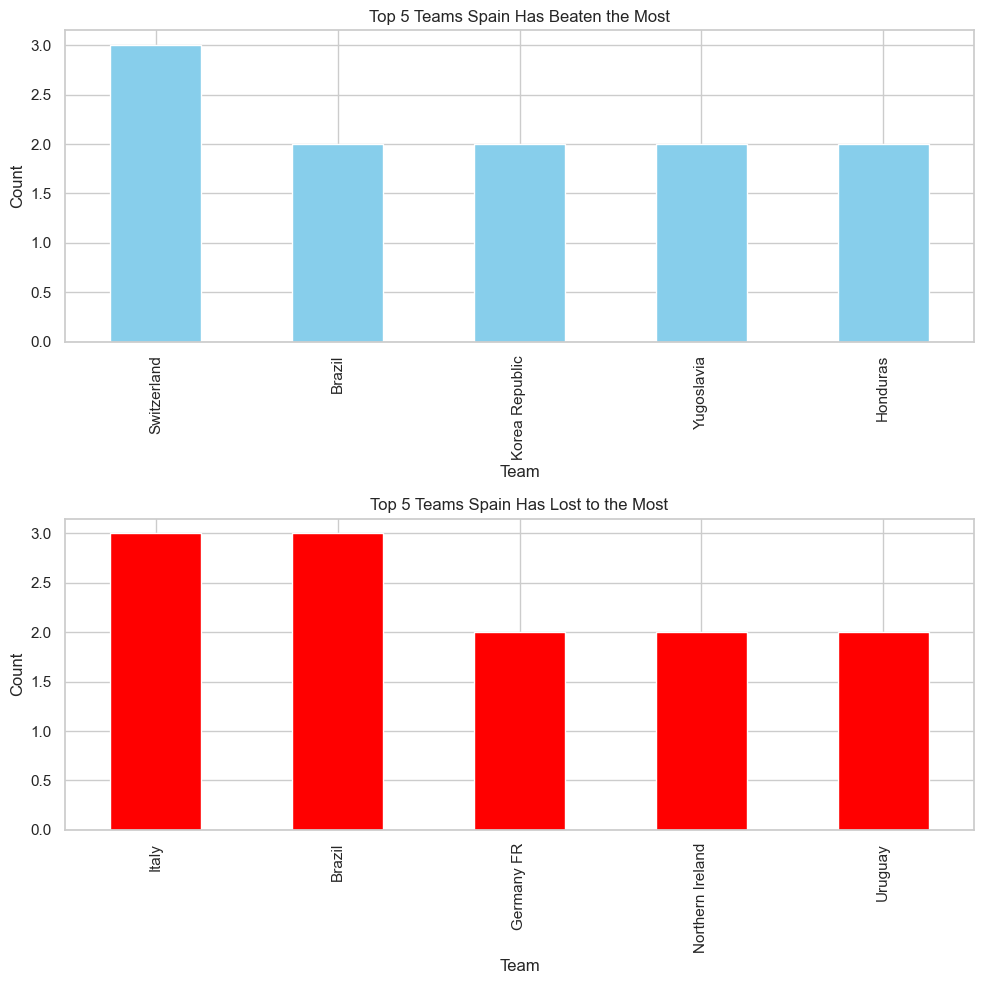

In [53]:
# Count occurrences of teams that Spain has beaten the most and lost to the most
most_wins_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts().head(5)
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts().head(5)

# Create separate plots for most wins and most losses
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot most wins
most_wins_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 5 Teams Spain Has Beaten the Most')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Count')

# Plot most losses
most_losses_counts.plot(kind='bar', ax=axs[1], color='red')
axs[1].set_title('Top 5 Teams Spain Has Lost to the Most')
axs[1].set_xlabel('Team')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [54]:
# Initialize variables to track streaks
current_winning_streak = 0
max_winning_streak = 0
current_losing_streak = 0
max_losing_streak = 0

# Iterate through the Dataframe
for index, match in spain_matches.iterrows():
    if match['home team name'] == 'Spain' or match['away team name'] == 'Spain':
        # Check if Spain won the match
        if (match['home team name'] == 'Spain' and match['home team goals'] > match['away team goals']) or (match['away team name'] == 'Spain' and match['away team goals'] > match['home team goals']):
            current_winning_streak += 1
            # Update max winning streak if current streak is greater
            if current_winning_streak > max_winning_streak:
                max_winning_streak = current_winning_streak
            # Reset losing streak
            current_losing_streak = 0
        # Check if Spain lost the match
        else:
            current_losing_streak += 1
            # Update max losing streak if current streak is greater
            if current_losing_streak > max_losing_streak:
                max_losing_streak = current_losing_streak
            # Reset winning streak
            current_winning_streak = 0

print("Spain's best winning streak:", max_winning_streak)
print("Spain's worst losing streak:", max_losing_streak)

Spain's best winning streak: 6
Spain's worst losing streak: 4


In [55]:
spain_copy = spain_matches.copy()

In [56]:
spain_copy['stage reached'] = ''

In [57]:
spain_copy[['year', 'stage']].value_counts()

year  stage            
2022  Group E              3
1986  Group D              3
2002  Group B              3
1998  Group D              3
2014  Group B              3
1994  Group C              3
2018  Group B              3
1990  Group E              3
2010  Group H              3
2006  Group H              3
1982  Group 5              3
1978  Group 3              3
1966  Group 2              3
1962  Group 3              3
1950  Group 6              3
      Group 2              3
1982  Group 2              2
1934  Quarter-finals       2
2010  Round of 16          1
1934  Preliminary round    1
2018  Round of 16          1
2010  Semi-finals          1
      Quarter-finals       1
1994  Round of 16          1
2010  Final                1
2006  Round of 16          1
2002  Round of 16          1
      Quarter-finals       1
1994  Quarter-finals       1
1990  Round of 16          1
1986  Round of 16          1
      Quarter-finals       1
2022  Round of 16          1
Name: count, dtype:

In [58]:
stage_mapping = {
    'Group B' : "Group Stage",
    'Group 2' : "Group Stage",
    'Group 3' : "Group Stage",
    'Group D' : "Group Stage",
    'Group E' : "Group Stage",
    'Group H' : "Group Stage",
    'Group 6' : "Group Stage",
    'Group 5' : "Group Stage",
    'Group C' : "Group Stage",
    'Round of 16' : "Round of 16",
    'Quarter-finals' : "Quarter-finals",
    'Preliminary round' : "Preliminary round",
    'Semi-finals' : "Semi-finals",
    'Final' : "Final"
}

In [59]:
spain_copy['stage reached'] = spain_copy['stage'].map(stage_mapping)

In [60]:
display(spain_copy)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached
0,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,,21000,3,0,ESP,BRA,Preliminary round
1,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,35000,0,0,ITA,ESP,Quarter-finals
2,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,0,Spain,,43000,1,0,ITA,ESP,Quarter-finals
3,1950,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3,1,USA,,9511,0,1,ESP,USA,Group Stage
4,1950,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2,0,Chile,,19790,2,0,ESP,CHI,Group Stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2018,1 Jul 2018 -,Round of 16,Luzhniki Stadium,Moscow,Spain,1,1,Russia,Russia win in penalties,78011,1,1,ESP,RUS,Round of 16
63,2022,23 Nov 2022 -,Group E,Al Thumama Stadium,Doha,Spain,7,0,Costa Rica,,40013,3,0,ESP,CRC,Group Stage
64,2022,27 Nov 2022 -,Group E,Al Bayt Stadium,Al Khor,Spain,1,1,Germany,,68895,0,0,ESP,GER,Group Stage
65,2022,1 Dec 2022 -,Group E,Khalifa International Stadium,Al Rayyan,Japan,2,1,Spain,,44851,0,1,JAP,ESP,Group Stage


In [61]:
spain_copy[['year', 'stage reached']].value_counts()

year  stage reached    
1950  Group Stage          6
1982  Group Stage          5
1998  Group Stage          3
2018  Group Stage          3
2006  Group Stage          3
2002  Group Stage          3
2014  Group Stage          3
1994  Group Stage          3
1990  Group Stage          3
2022  Group Stage          3
1986  Group Stage          3
1978  Group Stage          3
1966  Group Stage          3
1962  Group Stage          3
2010  Group Stage          3
1934  Quarter-finals       2
2018  Round of 16          1
2010  Final                1
      Semi-finals          1
      Round of 16          1
      Quarter-finals       1
1934  Preliminary round    1
2006  Round of 16          1
2002  Round of 16          1
      Quarter-finals       1
1994  Round of 16          1
      Quarter-finals       1
1990  Round of 16          1
1986  Round of 16          1
      Quarter-finals       1
2022  Round of 16          1
Name: count, dtype: int64

In [62]:
grouped_year_stage = spain_copy.groupby('stage reached').agg({'year': 'count'})

In [63]:
display(grouped_year_stage)

,year
stage reached,
Final,1
Group Stage,50
Preliminary round,1
Quarter-finals,6
Round of 16,8
Semi-finals,1


In [64]:
spain_copy['furthest stage'] = ''

In [65]:
last_stage_per_year = spain_copy.groupby('year')['stage reached'].last()

In [66]:
spain_copy['furthest stage'] = spain_copy['year'].map(last_stage_per_year)

In [67]:
spain_copy['furthest stage'].value_counts()

furthest stage
Group Stage       26
Quarter-finals    18
Round of 16       16
Final              7
Name: count, dtype: int64

In [ ]:
#st.write("Spain world cup matches below:", spain_copy, 'Spain World Cup Matches Above')

In [ ]:
#spain_copy['datetime'] = spain_copy['datetime'].apply(lambda x: x.split('-')[0].strip())

In [68]:
spain_copy['spain role'] = spain_copy.apply(lambda row: 'home' if row['home team name'] == 'Spain' else 'away', axis=1)

In [72]:
spain_copy.tail(30)

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
37,1998,13 Jun 1998 - 14:30,Group D,La Beaujoire,Nantes,Spain,2,3,Nigeria,,35500,1,1,ESP,NGA,Group Stage,Group Stage,home
38,1998,19 Jun 1998 - 21:00,Group D,Stade Geoffroy Guichard,Saint-Etienne,Spain,0,0,Paraguay,,30600,0,0,ESP,PAR,Group Stage,Group Stage,home
39,1998,24 Jun 1998 - 21:00,Group D,Stade Felix Bollaert,Lens,Spain,6,1,Bulgaria,,38100,2,0,ESP,BUL,Group Stage,Group Stage,home
40,2002,02 Jun 2002 - 20:30,Group B,Gwangju World Cup Stadium,Gwangju,Spain,3,1,Slovenia,,28598,1,0,ESP,SVN,Group Stage,Quarter-finals,home
41,2002,07 June 2002 - 18:00,Group B,Jeonju World Cup Stadium,Jeonju,Spain,3,1,Paraguay,,24000,0,1,ESP,PAR,Group Stage,Quarter-finals,home
42,2002,12 Jun 2002 - 20:30,Group B,Daejeon World Cup Stadium,Daejeon,South Africa,2,3,Spain,,31024,1,2,RSA,ESP,Group Stage,Quarter-finals,away
43,2002,16 Jun 2002 - 20:30,Round of 16,Suwon World Cup Stadium,Suwon,Spain,1,1,"rn"">Republic of Ireland",Spain win on penalties (3 - 2),38926,0,0,ESP,IRL,Round of 16,Quarter-finals,home
44,2002,22 Jun 2002 - 15:30,Quarter-finals,Gwangju World Cup Stadium,Gwangju,Spain,0,0,Korea Republic,Korea Republic win on penalties (3 - 5),42114,0,0,ESP,KOR,Quarter-finals,Quarter-finals,home
45,2006,14 Jun 2006 - 15:00,Group H,Zentralstadion,Leipzig,Spain,4,0,Ukraine,,43000,2,0,ESP,UKR,Group Stage,Round of 16,home
46,2006,19 Jun 2006 - 21:00,Group H,Gottlieb-Daimler-Stadion,Stuttgart,Spain,3,1,Tunisia,,52000,0,1,ESP,TUN,Group Stage,Round of 16,home


In [70]:
# Group by year and Spain's role in the match, then calculate the average goals scored and conceded
avg_goals_by_year = spain_copy.groupby(['year', 'spain role']).agg({
    'home team goals': 'mean', 'away team goals': 'mean'}).unstack()

print(round(avg_goals_by_year,2))

           home team goals       away team goals      
spain role            away  home            away  home
year                                                  
1934                  1.00  3.00            0.50  1.00
1950                  3.67  2.00            1.33  0.33
1962                  1.50  1.00            0.50  0.00
1966                  2.00  2.00            1.00  1.00
1978                  1.00  1.00            0.50  0.00
1982                  1.50  1.00            0.50  0.67
1986                  0.67  0.50            3.33  1.00
1990                  0.67  1.00            1.67  2.00
1994                  1.33  2.50            1.67  1.00
1998                   NaN  2.67             NaN  1.33
2002                  2.00  1.75            3.00  0.75
2006                  0.00  2.67            1.00  1.33
2010                  0.25  1.00            1.25  0.33
2014                  0.00  0.50            3.00  3.50
2018                  1.50  1.50            2.00  1.50
2022      

In [99]:
# Filter matches where is spain is Home or is Away
spain_home_matches_test = spain_copy[spain_copy['home team name'] == 'Spain']
spain_away_matches_test = spain_copy[spain_copy['away team name'] == 'Spain']

spain_home_matches_2018 = spain_home_matches_test[spain_home_matches_test['year'] == 2018]
spain_away_matches_2018 = spain_away_matches_test[spain_away_matches_test['year'] == 2018]


# Calculate average goals scored and conceded when Spain is Home
avg_goals_scored_home_2018 = (spain_home_matches_2018['home team goals'].sum())/(len(spain_home_matches_2018['home team goals']))
avg_goals_conceded_home_2018 = spain_home_matches_2018['away team goals'].mean()

# Calculate average goals scored and conceded when Spain is Away
avg_goals_scored_away_2018 = spain_away_matches_2018['away team goals'].mean()
avg_goals_conceded_away_2018 = spain_away_matches_2018['home team goals'].mean()

# Calculate overall average goals scored and conceded
avg_goals_scored = (avg_goals_scored_home_2018 + avg_goals_scored_away_2018) / 2
avg_goals_conceded = (avg_goals_conceded_home_2018 + avg_goals_conceded_away_2018) / 2

print("Average goals scored by Spain per match:", avg_goals_scored)
print("Average goals conceded by Spain per match:", avg_goals_conceded)

Average goals scored by Spain per match: 1.75
Average goals conceded by Spain per match: 1.5


In [77]:
new_wc_editions = [2022, 2018, 2014, 2010, 2006, 2002, 1998]
old_wc_editions = [1994, 1990, 1986, 1982, 1978, 1966, 1962]

In [86]:
for year in new_wc_editions:
    spain_home_matches_test = spain_copy[spain_copy['home team name'] == 'Spain']
    spain_away_matches_test = spain_copy[spain_copy['away team name'] == 'Spain']
    
    
    spain_home_matches_testing = spain_home_matches_test[spain_home_matches_test['year'] == year]
    spain_away_matches_testing = spain_away_matches_test[spain_away_matches_test['year'] == year]
    
    avg_goals_scored_home_testing = spain_home_matches_testing['home team goals'].mean()
    avg_goals_conceded_home_testing = spain_home_matches_testing['away team goals'].mean()
    
    avg_goals_scored_away_testing = spain_away_matches_testing['away team goals'].mean()
    avg_goals_conceded_away_testing = spain_away_matches_testing['home team goals'].mean()
    
    avg_goals_scored_test = (avg_goals_scored_home_testing + avg_goals_scored_away_testing) / 2
    avg_goals_conceded_test = (avg_goals_conceded_home_testing + avg_goals_conceded_away_testing) / 2
    
    #calculate goal differential
    goal_difference = (spain_home_matches_testing['home team goals'].sum() + spain_away_matches_testing['away team goals'].sum()).astype(int) - (spain_home_matches_testing['away team goals'].sum() + spain_away_matches_testing['home team goals'].sum()).astype(int)
    #print(goal_difference)
    
    print(f"Average goals scored by Spain per match in {year}:", round(avg_goals_scored_test,3))
    print(f"Average goals conceded by Spain per match in {year}:", round(avg_goals_conceded_test,3))
    print(f"Goal difference for wc {year} is: ", goal_difference)

Average goals scored by Spain per match in 2022: 2.25
Average goals conceded by Spain per match in 2022: 0.75
Goal difference for wc 2022 is:  6
Average goals scored by Spain per match in 2018: 1.75
Average goals conceded by Spain per match in 2018: 1.5
Goal difference for wc 2018 is:  1
Average goals scored by Spain per match in 2014: 1.75
Average goals conceded by Spain per match in 2014: 1.75
Goal difference for wc 2014 is:  -3
Average goals scored by Spain per match in 2010: 1.125
Average goals conceded by Spain per match in 2010: 0.292
Goal difference for wc 2010 is:  6
Average goals scored by Spain per match in 2006: 1.833
Average goals conceded by Spain per match in 2006: 0.667
Goal difference for wc 2006 is:  5
Average goals scored by Spain per match in 2002: 2.375
Average goals conceded by Spain per match in 2002: 1.375
Goal difference for wc 2002 is:  5
Average goals scored by Spain per match in 1998: nan
Average goals conceded by Spain per match in 1998: nan
Goal difference 

In [88]:
for year in old_wc_editions:
    spain_home_matches_test = spain_copy[spain_copy['home team name'] == 'Spain']
    spain_away_matches_test = spain_copy[spain_copy['away team name'] == 'Spain']
    
    
    spain_home_matches_testing = spain_home_matches_test[spain_home_matches_test['year'] == year]
    spain_away_matches_testing = spain_away_matches_test[spain_away_matches_test['year'] == year]
    
    avg_goals_scored_home_testing = spain_home_matches_testing['home team goals'].mean()
    avg_goals_conceded_home_testing = spain_home_matches_testing['away team goals'].mean()
    
    avg_goals_scored_away_testing = spain_away_matches_testing['away team goals'].mean()
    avg_goals_conceded_away_testing = spain_away_matches_testing['home team goals'].mean()
    
    avg_goals_scored_test = (avg_goals_scored_home_testing + avg_goals_scored_away_testing) / 2
    avg_goals_conceded_test = (avg_goals_conceded_home_testing + avg_goals_conceded_away_testing) / 2
    
    #calculate goal differential
    goal_difference = (spain_home_matches_testing['home team goals'].sum() + spain_away_matches_testing['away team goals'].sum()) - (spain_home_matches_testing['away team goals'].sum() + spain_away_matches_testing['home team goals'].sum())
    #print(goal_difference)
    
    print(f"Average goals scored by Spain per match in {year}:", round(avg_goals_scored_test,3))
    print(f"Average goals conceded by Spain per match in {year}:", round(avg_goals_conceded_test,3))
    print(f"Goal difference for wc {year} is: ", goal_difference)

Average goals scored by Spain per match in 1994: 2.083
Average goals conceded by Spain per match in 1994: 1.167
Goal difference for wc 1994 is:  4
Average goals scored by Spain per match in 1990: 1.333
Average goals conceded by Spain per match in 1990: 1.333
Goal difference for wc 1990 is:  2
Average goals scored by Spain per match in 1986: 1.917
Average goals conceded by Spain per match in 1986: 0.833
Goal difference for wc 1986 is:  7
Average goals scored by Spain per match in 1982: 0.75
Average goals conceded by Spain per match in 1982: 1.083
Goal difference for wc 1982 is:  -1
Average goals scored by Spain per match in 1978: 0.75
Average goals conceded by Spain per match in 1978: 0.5
Goal difference for wc 1978 is:  0
Average goals scored by Spain per match in 1966: 1.5
Average goals conceded by Spain per match in 1966: 1.5
Goal difference for wc 1966 is:  -1
Average goals scored by Spain per match in 1962: 0.75
Average goals conceded by Spain per match in 1962: 0.75
Goal differenc

In [ ]:
grouped_year = spain_copy.groupby('year')

In [ ]:
test_year = spain_copy[spain_copy['year']==1998]

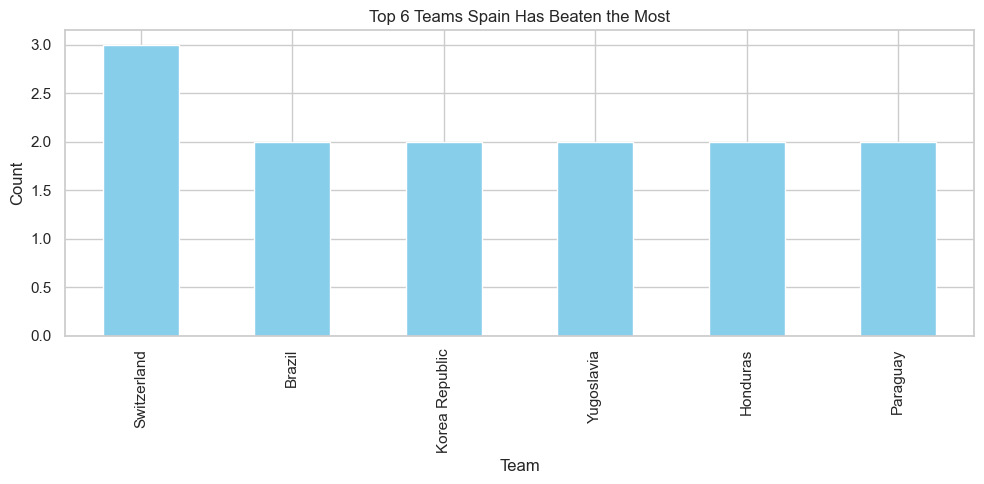

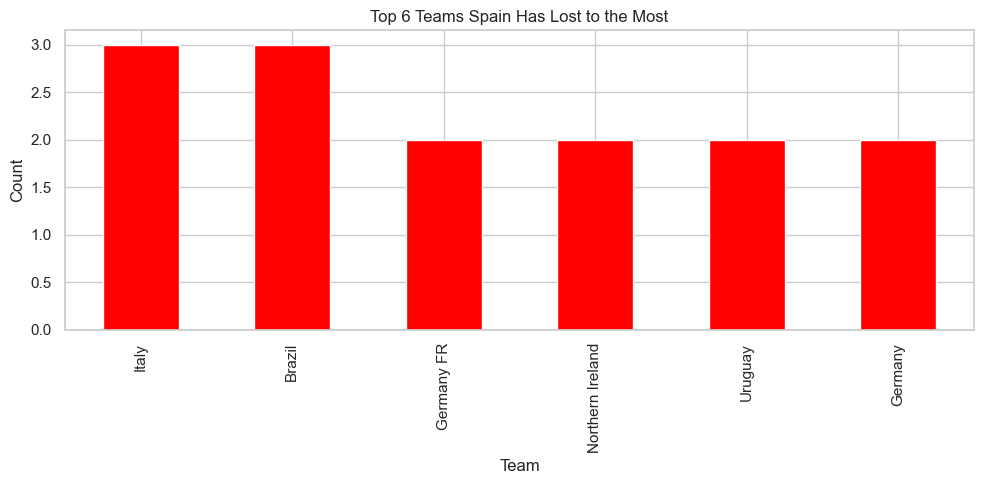

In [97]:
# Count occurrences of teams that Spain has beaten the most and lost to the most
most_wins_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts().head(6)
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts().head(6)

# Create separate plots for most wins and most losses
fig, ax = plt.subplots(figsize=(10, 5))

# Plot most wins
most_wins_counts.plot(kind='bar', color='skyblue')
ax.set_title('Top 6 Teams Spain Has Beaten the Most')
ax.set_xlabel('Team')
ax.set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

# Create another figure for most losses
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot most losses
most_losses_counts.plot(kind='bar', color='red')
ax2.set_title('Top 6 Teams Spain Has Lost to the Most')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Count occurrences of teams that Spain has scored the most and gotten scored on the most
most_goals_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team goals'].sum()
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team goals'].value_counts().head(6)
